In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import date, timedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1db6a7c8c88>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'date': '2010-01-01',
 'id': 1,
 'tobs': 65.0}

In [11]:
# Calculate the date 1 year ago from the last data point in the database
from sqlalchemy import distinct
month_data_distinct = session.query(distinct(Measurement.date)).order_by(Measurement.date.desc()).limit(365)
month_data_distinct

In [13]:
month_list_12 = []
for month in month_data_distinct:
    month_list_12.append(month[0])
month_list_12

['2017-08-23',
 '2017-08-22',
 '2017-08-21',
 '2017-08-20',
 '2017-08-19',
 '2017-08-18',
 '2017-08-17',
 '2017-08-16',
 '2017-08-15',
 '2017-08-14',
 '2017-08-13',
 '2017-08-12',
 '2017-08-11',
 '2017-08-10',
 '2017-08-09',
 '2017-08-08',
 '2017-08-07',
 '2017-08-06',
 '2017-08-05',
 '2017-08-04',
 '2017-08-03',
 '2017-08-02',
 '2017-08-01',
 '2017-07-31',
 '2017-07-30',
 '2017-07-29',
 '2017-07-28',
 '2017-07-27',
 '2017-07-26',
 '2017-07-25',
 '2017-07-24',
 '2017-07-23',
 '2017-07-22',
 '2017-07-21',
 '2017-07-20',
 '2017-07-19',
 '2017-07-18',
 '2017-07-17',
 '2017-07-16',
 '2017-07-15',
 '2017-07-14',
 '2017-07-13',
 '2017-07-12',
 '2017-07-11',
 '2017-07-10',
 '2017-07-09',
 '2017-07-08',
 '2017-07-07',
 '2017-07-06',
 '2017-07-05',
 '2017-07-04',
 '2017-07-03',
 '2017-07-02',
 '2017-07-01',
 '2017-06-30',
 '2017-06-29',
 '2017-06-28',
 '2017-06-27',
 '2017-06-26',
 '2017-06-25',
 '2017-06-24',
 '2017-06-23',
 '2017-06-22',
 '2017-06-21',
 '2017-06-20',
 '2017-06-19',
 '2017-06-

In [14]:
# Perform a query to retrieve the data and precipitation scores
precp_all = engine.execute('SELECT * FROM Measurement ORDER BY date DESC').fetchall()
precp_all

[(2724, 'USC00519397', '2017-08-23', 0.0, 81.0),
 (7635, 'USC00514830', '2017-08-23', 0.0, 82.0),
 (12187, 'USC00519523', '2017-08-23', 0.08, 82.0),
 (19550, 'USC00516128', '2017-08-23', 0.45, 76.0),
 (2723, 'USC00519397', '2017-08-22', 0.0, 82.0),
 (12186, 'USC00519523', '2017-08-22', 0.0, 82.0),
 (19549, 'USC00516128', '2017-08-22', 0.5, 76.0),
 (2722, 'USC00519397', '2017-08-21', 0.0, 81.0),
 (7634, 'USC00514830', '2017-08-21', 0.02, 79.0),
 (12185, 'USC00519523', '2017-08-21', None, 82.0),
 (19548, 'USC00516128', '2017-08-21', 0.56, 76.0),
 (2721, 'USC00519397', '2017-08-20', 0.0, 81.0),
 (7633, 'USC00514830', '2017-08-20', 0.01, 80.0),
 (19547, 'USC00516128', '2017-08-20', None, 78.0),
 (2720, 'USC00519397', '2017-08-19', 0.0, 79.0),
 (7632, 'USC00514830', '2017-08-19', 0.0, 80.0),
 (12184, 'USC00519523', '2017-08-19', None, 85.0),
 (19546, 'USC00516128', '2017-08-19', 0.09, 71.0),
 (2719, 'USC00519397', '2017-08-18', 0.0, 80.0),
 (7631, 'USC00514830', '2017-08-18', 0.0, 77.0),
 (

In [16]:
precp_avg = session.query(Measurement.date, func.avg(Measurement.prcp)).\
            group_by(Measurement.date).order_by(Measurement.date.desc()).limit(365)

In [18]:
date_list=[]
precp_list=[]

for i in precp_all:
    date_list.append(i[2])
    precp_list.append(i[3])
    if i[2] == '2016-08-23':
        break

#Let's check the last date in our list
date_list[-1]

'2016-08-23'

In [22]:
#Let's create a date list in reversed order so that oldest date is at the top
for j in reversed(date_list):
    date_list_r = list(reversed(date_list))
date_list_r

['2016-08-23',
 '2016-08-24',
 '2016-08-24',
 '2016-08-24',
 '2016-08-24',
 '2016-08-24',
 '2016-08-24',
 '2016-08-24',
 '2016-08-25',
 '2016-08-25',
 '2016-08-25',
 '2016-08-25',
 '2016-08-25',
 '2016-08-25',
 '2016-08-25',
 '2016-08-26',
 '2016-08-26',
 '2016-08-26',
 '2016-08-26',
 '2016-08-26',
 '2016-08-26',
 '2016-08-27',
 '2016-08-27',
 '2016-08-27',
 '2016-08-27',
 '2016-08-27',
 '2016-08-27',
 '2016-08-28',
 '2016-08-28',
 '2016-08-28',
 '2016-08-28',
 '2016-08-28',
 '2016-08-28',
 '2016-08-29',
 '2016-08-29',
 '2016-08-29',
 '2016-08-29',
 '2016-08-29',
 '2016-08-29',
 '2016-08-29',
 '2016-08-30',
 '2016-08-30',
 '2016-08-30',
 '2016-08-30',
 '2016-08-30',
 '2016-08-30',
 '2016-08-31',
 '2016-08-31',
 '2016-08-31',
 '2016-08-31',
 '2016-08-31',
 '2016-08-31',
 '2016-08-31',
 '2016-09-01',
 '2016-09-01',
 '2016-09-01',
 '2016-09-01',
 '2016-09-01',
 '2016-09-01',
 '2016-09-02',
 '2016-09-02',
 '2016-09-02',
 '2016-09-02',
 '2016-09-02',
 '2016-09-02',
 '2016-09-02',
 '2016-09-

In [23]:
#Let's create a precipitation list in reversed order so that oldest value is at the top
for j in reversed(precp_list):
    precp_list_r = list(reversed(precp_list))
precp_list_r

[0.0,
 1.45,
 2.15,
 1.22,
 None,
 2.28,
 2.15,
 0.08,
 0.11,
 0.06,
 0.21,
 0.0,
 0.0,
 0.08,
 0.08,
 0.01,
 0.0,
 0.04,
 0.02,
 0.03,
 0.0,
 None,
 0.12,
 0.0,
 0.02,
 0.18,
 0.0,
 2.07,
 0.6,
 0.14,
 0.14,
 0.14,
 0.01,
 0.9,
 0.35,
 0.0,
 None,
 0.04,
 0.17,
 0.0,
 0.05,
 0.0,
 0.0,
 0.02,
 0.0,
 0.0,
 2.46,
 0.24,
 0.25,
 None,
 None,
 0.1,
 0.13,
 0.01,
 0.02,
 None,
 0.0,
 0.0,
 0.0,
 0.03,
 0.01,
 None,
 None,
 0.19,
 0.02,
 0.0,
 1.0,
 0.12,
 0.08,
 0.07,
 0.0,
 0.44,
 0.14,
 0.74,
 0.03,
 0.03,
 0.18,
 0.03,
 0.02,
 None,
 0.11,
 None,
 1.0,
 0.11,
 0.03,
 0.04,
 0.05,
 None,
 1.35,
 0.16,
 0.11,
 0.23,
 0.1,
 0.05,
 0.15,
 0.07,
 0.01,
 None,
 0.01,
 0.22,
 0.0,
 0.35,
 0.16,
 0.23,
 None,
 0.29,
 0.01,
 0.03,
 1.16,
 0.09,
 0.14,
 0.01,
 0.0,
 0.6,
 0.3,
 0.12,
 0.18,
 0.05,
 1.04,
 0.31,
 0.15,
 None,
 None,
 0.04,
 0.0,
 1.2,
 0.34,
 0.46,
 None,
 0.32,
 0.37,
 0.02,
 6.7,
 2.33,
 1.19,
 None,
 1.84,
 0.9,
 1.32,
 3.35,
 0.83,
 0.17,
 None,
 0.07,
 0.12,
 0.42,
 0.61,
 0.

In [24]:
# Save the query results as a Pandas DataFrame and set the index to the date column
final_df = pd.DataFrame(precp_list_r, date_list_r)
final_df = final_df.reset_index()
final_df.head()

,index,0
0,2016-08-23,0.00
1,2016-08-24,1.45
2,2016-08-24,2.15
3,2016-08-24,1.22
4,2016-08-24,NaN


In [25]:
final_df = final_df.rename(columns={"index":"Date", 0:"Precipitation"})
final_df.head()

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-24,1.45
2,2016-08-24,2.15
3,2016-08-24,1.22
4,2016-08-24,NaN


In [26]:
#set the index to the date column
final_df_date = final_df.set_index('Date')
final_df_date.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-24,1.45
2016-08-24,2.15
2016-08-24,1.22
2016-08-24,NaN


In [28]:
# Sort the dataframe by date
final_df_date.dropna(inplace=True)
final_df_date.sort_index().head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-24,1.45
2016-08-24,2.15
2016-08-24,1.22
2016-08-24,2.28


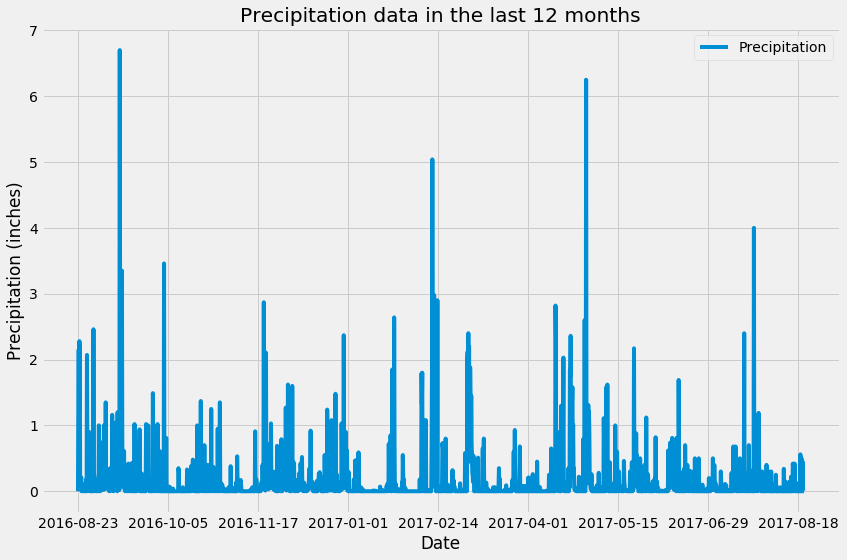

In [31]:
# Use Pandas Plotting with Matplotlib to plot the data
final_df_date.plot(title='Precipitation data in the last 12 months', figsize=(12,8))
plt.ylabel('Precipitation (inches)')
plt.tight_layout()
plt.show()

In [32]:
# Use Pandas to calcualte the summary statistics for the precipitation data
final_df_date.describe()

,Precipitation
count,2016.000000
mean,0.176374
std,0.460191
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [34]:
# Design a query to show how many stations are available in this dataset?
station_number = session.query(Station).distinct(Station.station).count()
station_number

9

In [35]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_count = (session.query(Measurement.station, func.count(Measurement.station))
                .group_by(Measurement.station)
                .order_by(func.count(Measurement.station).desc())
                .all())
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [36]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
active_station = station_count[0][0]
active_station_data_min = session.query(func.min(Measurement.tobs)).filter(Measurement.station == active_station).all()
active_station_data_max = session.query(func.max(Measurement.tobs)).filter(Measurement.station == active_station).all()
active_station_data_avg = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == active_station).all()
print(f'Lowest temperature recorded by Station ID {active_station} is {active_station_data_min[0][0]}.')
print(f'Highest temperature recorded by Station ID {active_station} is {active_station_data_max[0][0]}.')
print(f'Average temperature recorded by Station ID {active_station} is {active_station_data_avg[0][0]}.')

Lowest temperature recorded by Station ID USC00519281 is 54.0.
Highest temperature recorded by Station ID USC00519281 is 85.0.
Average temperature recorded by Station ID USC00519281 is 71.66378066378067.


In [37]:
# Choose the station with the highest number of temperature observations.
station_highest = station_count[0][0]
station_highest

'USC00519281'

In [41]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_12_month = []
station_12_temp = engine.execute(f'SELECT * FROM Measurement WHERE station = "{station_highest}" ORDER BY date DESC').fetchall()

for x in station_12_temp:
    station_12_month.append(x[4])
    if x[2] == '2016-08-23':
        break

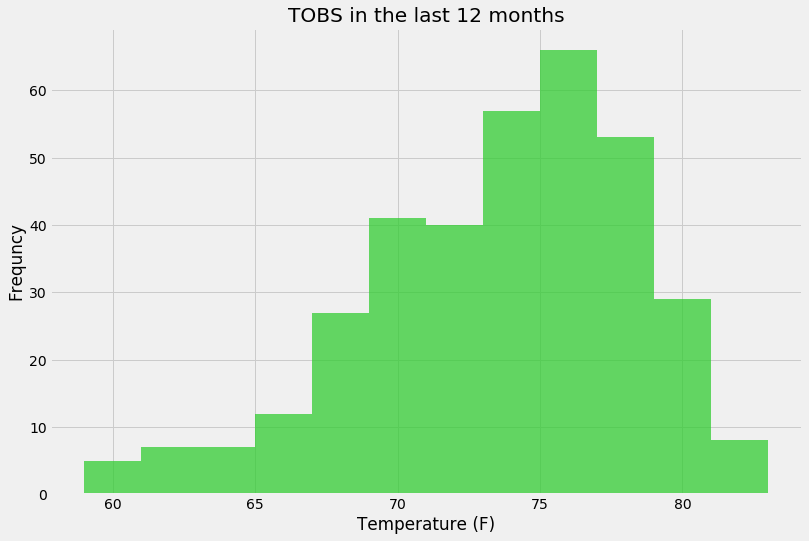

In [47]:
# plot the results as a histogram
plt.figure(figsize=(12,8))
plt.hist(station_12_month, bins=12, alpha=0.75, color='limegreen')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequncy')
plt.title('TOBS in the last 12 months')
plt.show()

## Bonus Challenge Assignment

In [48]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [57]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
temperature_values = calc_temps('2017-04-20', '2017-04-30')
tmin = temperature_values[0][0]
tavg = temperature_values[0][1]
tmax = temperature_values[0][2]
print(f'Lowest temperature recorded is {tmin}.')
print(f'Highest temperature recorded is {tmax}.')
print(f'Average temperature recorded is {tavg}.')

Lowest temperature recorded is 58.0.
Highest temperature recorded is 81.0.
Average temperature recorded is 73.08695652173913.


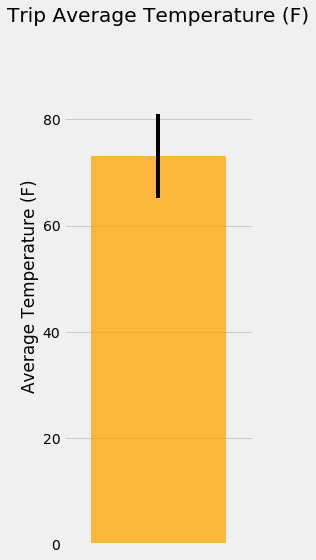

In [58]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig, ax = plt.subplots(figsize=(4, 8))
y = tavg
x_pos = 1
error = tmax - tavg
bar = ax.bar(x_pos, y, yerr=error, alpha=0.75, color='orange', align='center')
ax.set(xticks=range(x_pos), xticklabels="a", title="Trip Average Temperature (F)", ylabel="Average Temperature (F)")
ax.margins(.2, .2)
plt.tight_layout()
plt.show()

In [59]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
start_date = '2017-04-20'
end_date = '2017-04-30'


stats_trip_data = session.query(Station.station, Station.name, Station.latitude, Station.longitude,
                                Station.elevation, func.sum(Measurement.prcp)).\
                    filter(Measurement.station == Station.station).\
                    filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).\
                    group_by(Station.station).order_by(func.sum(Measurement.prcp).desc()).all()
stats_trip_data

[('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  10.28),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 6.78),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  5.82),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  5.510000000000001),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  4.12),
 ('USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  1.6400000000000001),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, None)]

In [60]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [61]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
trip_day_list = pd.date_range(start_date,end_date)
trip_day_list

DatetimeIndex(['2017-04-20', '2017-04-21', '2017-04-22', '2017-04-23',
               '2017-04-24', '2017-04-25', '2017-04-26', '2017-04-27',
               '2017-04-28', '2017-04-29', '2017-04-30'],
              dtype='datetime64[ns]', freq='D')

In [62]:
date_time = trip_day_list.strftime("%m-%d")
print("date and time:",date_time)

date and time: Index(['04-20', '04-21', '04-22', '04-23', '04-24', '04-25', '04-26', '04-27',
       '04-28', '04-29', '04-30'],
      dtype='object')


In [63]:
from datetime import datetime as dt
mon_day_list = []

for i in date_time:
    mon_day = dt.strptime(i, '%m-%d').strftime("%m-%d")
    mon_day_list.append(mon_day)

mon_day_list

['04-20',
 '04-21',
 '04-22',
 '04-23',
 '04-24',
 '04-25',
 '04-26',
 '04-27',
 '04-28',
 '04-29',
 '04-30']

In [64]:
normals  = []

for i in mon_day_list:
    normals.append(daily_normals(i)[0])
    
normals

[(64.0, 72.73684210526316, 80.0),
 (66.0, 72.32142857142857, 78.0),
 (65.0, 72.92727272727272, 84.0),
 (65.0, 73.01818181818182, 79.0),
 (67.0, 73.3103448275862, 80.0),
 (66.0, 73.96551724137932, 83.0),
 (66.0, 74.01724137931035, 81.0),
 (65.0, 72.87272727272727, 81.0),
 (63.0, 73.46428571428571, 79.0),
 (66.0, 73.30357142857143, 81.0),
 (58.0, 71.5576923076923, 78.0)]

In [65]:
data_df = pd.DataFrame(normals, columns = ['Min', 'Max', 'Avg'])
data_df

,Min,Max,Avg
0,64.0,72.736842,80.0
1,66.0,72.321429,78.0
2,65.0,72.927273,84.0
3,65.0,73.018182,79.0
4,67.0,73.310345,80.0
5,66.0,73.965517,83.0
6,66.0,74.017241,81.0
7,65.0,72.872727,81.0
8,63.0,73.464286,79.0
9,66.0,73.303571,81.0


In [66]:
trip_day_list_1 = pd.DataFrame(trip_day_list, columns = ["Date"])
trip_day_list_1

,Date
0,2017-04-20
1,2017-04-21
2,2017-04-22
3,2017-04-23
4,2017-04-24
5,2017-04-25
6,2017-04-26
7,2017-04-27
8,2017-04-28
9,2017-04-29


In [67]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
trip_dates = pd.concat([trip_day_list_1, data_df], axis=1)
trip_dates.set_index('Date', inplace=True)
trip_dates

,Min,Max,Avg
Date,,,
2017-04-20,64.0,72.736842,80.0
2017-04-21,66.0,72.321429,78.0
2017-04-22,65.0,72.927273,84.0
2017-04-23,65.0,73.018182,79.0
2017-04-24,67.0,73.310345,80.0
2017-04-25,66.0,73.965517,83.0
2017-04-26,66.0,74.017241,81.0
2017-04-27,65.0,72.872727,81.0
2017-04-28,63.0,73.464286,79.0


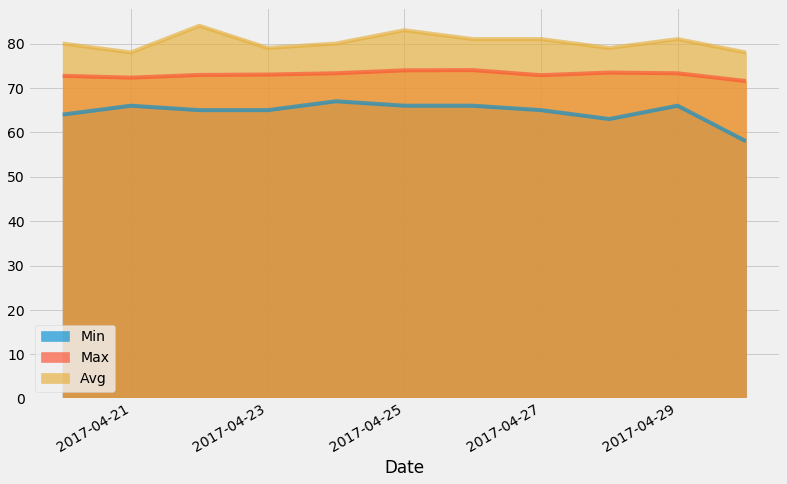

In [70]:
# Plot the daily normals as an area plot with `stacked=False`
trip_dates.plot(kind='area', alpha=0.65, stacked=False, figsize=(12,8), x_compat=True)
plt.show()